# Content

+ Data Cleaning
+ Exploratory Visualization
+ Feature Engineering
+ Basic Modeling & Evaluation
+ Hyperparameters tuning
+ Ensemble Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# combine train and test set.
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
combined_data=pd.concat([train,test],ignore_index=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [8]:
combined_data.head(5)

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

## First Let's take a look at our data graphically.

In [155]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
combined_data.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(combined_data.Survived, combined_data.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
combined_data.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(combined_data.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
combined_data.Age[combined_data.Pclass == 1].plot(kind='kde')    
combined_data.Age[combined_data.Pclass == 2].plot(kind='kde')
combined_data.Age[combined_data.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
combined_data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(combined_data.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Passengers per boarding location')

# Data Cleaning

In [9]:
combined_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

__The 'Age', 'Cabin', 'Embarked', 'Fare' columns have missing values. First we fill the missing 'Embarked' with the mode.__

In [10]:
combined_data.Embarked.mode()

0    S
dtype: object

In [12]:
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")
['Embarked'].fillna('S',inplace=True)

__Since 'Fare' is mainly related to 'Pclass', we should check which class this person belongs to.__

In [13]:
combined_data[combined_data.Fare.isnull()]

Age Cabin Embarked  Fare                Name  Parch  PassengerId  \
1043  60.5   NaN        S   NaN  Storey, Mr. Thomas      0         1044   

      Pclass   Sex  SibSp  Survived Ticket  
1043       3  male      0       NaN   3701

__It's a passenger from Pclass 3, so we'll fill the missing value with the median fare of Pclass 3.__

In [14]:
combined_data.Fare.fillna(combined_data[combined_data.Pclass==3]['Fare'].median(),inplace=True)

**There are a lot of missing values in 'Cabin', maybe there is difference between the survival rate of people who has Cabin number and those who hasn't.**

In [15]:
combined_data.loc[combined_data.Cabin.notnull(),'Cabin']=1
combined_data.loc[combined_data.Cabin.isnull(),'Cabin']=0

In [16]:
combined_data.Cabin.isnull().sum()

0

Text(0.5, 1.0, 'Survival Rate')

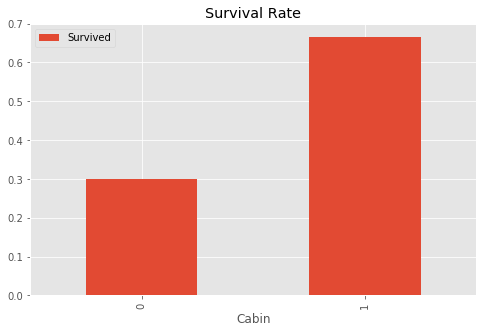

In [17]:
pd.pivot_table(combined_data,index=['Cabin'],values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate')

__We can also plot the count of 'Cabin' to see some patterns.__

In [18]:
cabin=pd.crosstab(combined_data.Cabin,combined_data.Survived)
cabin.rename(index={0:'no cabin',1:'cabin'},columns={0.0:'Dead',1.0:'Survived'},inplace=True)
cabin

Survived  Dead  Survived
Cabin                   
no cabin   481       206
cabin       68       136

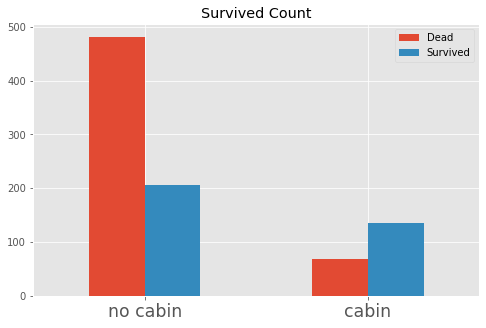

In [19]:
cabin.plot.bar(figsize=(8,5))
plt.xticks(rotation=0,size='xx-large')
plt.title('Survived Count')
plt.xlabel('')
plt.legend()

__From the plot, we can conclude that there is far more chance for a passenger to survive if we know his/her 'Cabin'.__

### Extract Title from 'Name'

In [20]:
combined_data['Title']=combined_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [21]:
combined_data.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Mme               1
the Countess      1
Don               1
Dona              1
Capt              1
Lady              1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

In [22]:
pd.crosstab(combined_data.Title,combined_data.Sex)

Sex           female  male
Title                     
Capt               0     1
Col                0     4
Don                0     1
Dona               1     0
Dr                 1     7
Jonkheer           0     1
Lady               1     0
Major              0     2
Master             0    61
Miss             260     0
Mlle               2     0
Mme                1     0
Mr                 0   757
Mrs              197     0
Ms                 2     0
Rev                0     8
Sir                0     1
the Countess       1     0

__All the 'Title' belongs to one kind of gender except for 'Dr'.__

In [23]:
combined_data[(combined_data.Title=='Dr')&(combined_data.Sex=='female')]

Age  Cabin Embarked     Fare                         Name  Parch  \
796  49.0      1        S  25.9292  Leader, Dr. Alice (Farnham)      0   

     PassengerId  Pclass     Sex  SibSp  Survived Ticket Title  
796          797       1  female      0       1.0  17465    Dr

__So the PassengerId of the female 'Dr' is '797'. Then we map the 'Title'.__

In [24]:
nn={'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
    'the Countess':'Rarewoman'}

In [25]:
combined_data.Title=combined_data.Title.map(nn)

In [26]:
# assign the female 'Dr' to 'Rarewoman'
combined_data.loc[combined_data.PassengerId==797,'Title']='Rarewoman'

In [27]:
combined_data.Title.value_counts()

Mr           765
Miss         260
Mrs          197
Master        61
Rareman       17
Rarewoman      9
Name: Title, dtype: int64

In [28]:
combined_data[combined_data.Title=='Master']['Sex'].value_counts()

male    61
Name: Sex, dtype: int64

In [29]:
combined_data[combined_data.Title=='Master']['Age'].describe()

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64

In [30]:
combined_data[combined_data.Title=='Miss']['Age'].describe()

count    210.000000
mean      21.774238
std       12.249077
min        0.170000
25%       15.000000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

+ __'Master' mainly stands for little boy, but we also want to find little girl. Because children tend to have higher survival rate.__

+ __For the 'Miss' with a Age record, we can simply determine whether a 'Miss' is a little girl by her age.__

+ __For the 'Miss' with no Age record, we use (Parch!=0). Since if it's a little girl, she was very likely to be accompanied by parents.__

We'll create a function to filter the girls. The function can't be used if 'Age' is Nan, so first we fill the missing values with '999'.

In [31]:
combined_data.Age.fillna(999,inplace=True)

In [32]:
def girl(aa):
    if (aa.Age!=999)&(aa.Title=='Miss')&(aa.Age<=14):
        return 'Girl'
    elif (aa.Age==999)&(aa.Title=='Miss')&(aa.Parch!=0):
        return 'Girl'
    else:
        return aa.Title

In [33]:
combined_data['Title']=combined_data.apply(girl,axis=1)

In [34]:
combined_data.Title.value_counts()

Mr           765
Miss         201
Mrs          197
Master        61
Girl          59
Rareman       17
Rarewoman      9
Name: Title, dtype: int64

__Next we fill the missing 'Age' according to their 'Title'.__

In [35]:
combined_data[combined_data.Age==999]['Age'].value_counts()

999.0    263
Name: Age, dtype: int64

In [36]:
Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    combined_data.loc[(combined_data.Age==999)&(combined_data.Title==i),'Age']=combined_data.loc[combined_data.Title==i,'Age'].median()

In [37]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


### Finally, there is no missing value now!!!

# Exploratory Visualization

In [39]:
combined_data.head(5)

Age  Cabin Embarked     Fare  \
0  22.0      0        S   7.2500   
1  38.0      1        C  71.2833   
2  26.0      0        S   7.9250   
3  35.0      1        S  53.1000   
4  35.0      0        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket Title  
0       3    male      1       0.0         A/5 21171    Mr  
1       1  female      1       1.0          PC 17599   Mrs  
2       3  female      0       1.0  STON/O2. 3101282  Miss  
3       1  female      1       1.0            113803   Mrs  
4       3    male      0       0.0            373450    Mr

__Let's first check whether the Age of each Title is reasonable.__

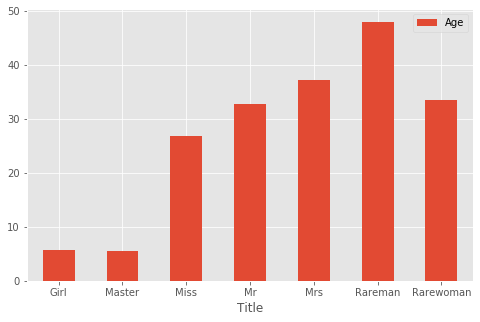

In [40]:
combined_data.groupby(['Title'])[['Age','Title']].mean().plot(kind='bar',figsize=(8,5))
plt.xticks(rotation=0)
plt.show()

__As we can see, female has a much larger survival rate than male.__

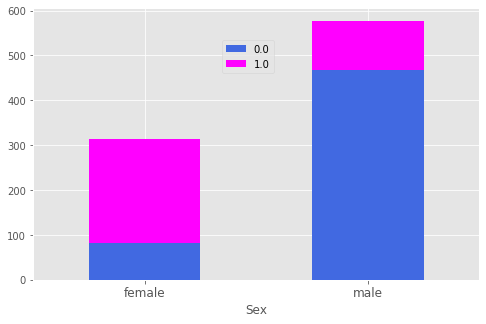

In [41]:
pd.crosstab(combined_data.Sex,combined_data.Survived).plot.bar(stacked=True,figsize=(8,5),color=['#4169E1','#FF00FF'])
plt.xticks(rotation=0,size='large')
plt.legend(bbox_to_anchor=(0.55,0.9))

__ We can also check the relationship between 'Age' and 'Survived'.__

In [42]:
agehist=pd.concat([combined_data[combined_data.Survived==1]['Age'],combined_data[combined_data.Survived==0]['Age']],axis=1)
agehist.columns=['Survived','Dead']
agehist.head()

Survived  Dead
0       NaN  22.0
1      38.0   NaN
2      26.0   NaN
3      35.0   NaN
4       NaN  35.0

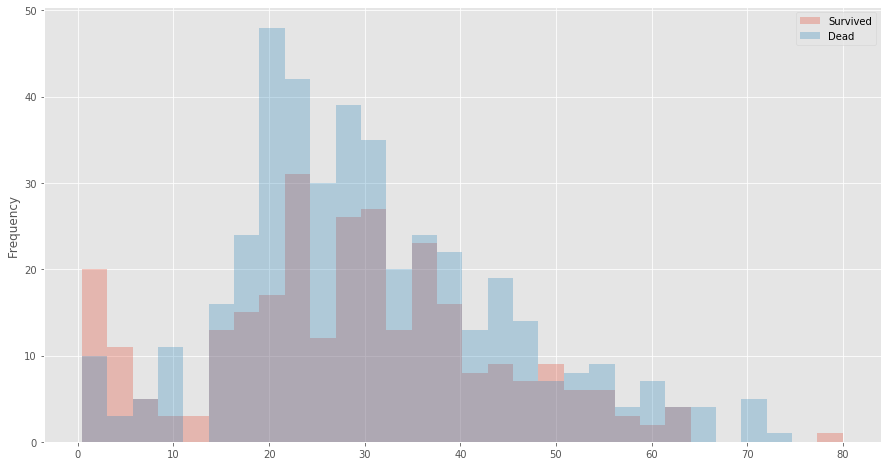

In [43]:
agehist.plot(kind='hist',bins=30,figsize=(15,8),alpha=0.3)

In [44]:
farehist=pd.concat([combined_data[combined_data.Survived==1]['Fare'],combined_data[combined_data.Survived==0]['Fare']],axis=1)
farehist.columns=['Survived','Dead']
farehist.head()

Survived  Dead
0       NaN  7.25
1   71.2833   NaN
2    7.9250   NaN
3   53.1000   NaN
4       NaN  8.05

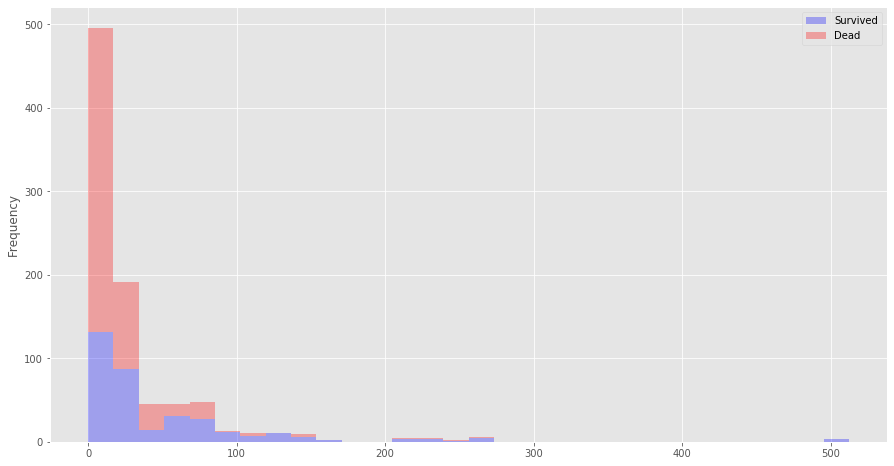

In [45]:
farehist.plot.hist(bins=30,figsize=(15,8),alpha=0.3,stacked=True,color=['blue','red'])

__People with high 'Fare' are more likely to survive, though most 'Fare' are under 100.__

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

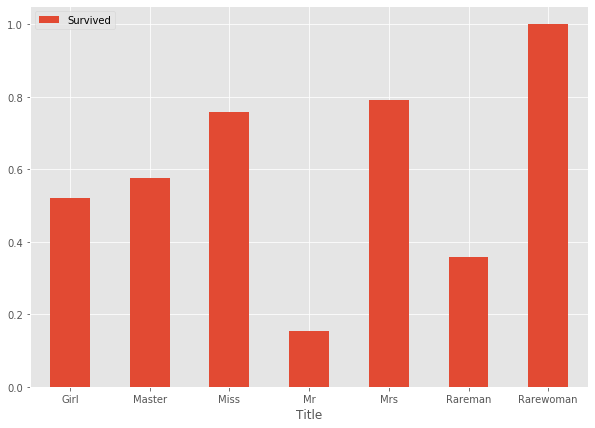

In [46]:
combined_data.groupby(['Title'])[['Title','Survived']].mean().plot(kind='bar',figsize=(10,7))
plt.xticks(rotation=0)

__The 'Rarewoman' has 100% survival rate, that's amazing!!__

__It's natural to assume that 'Pclass' also plays a big part, as we can see from the plot below. The females in class 3 have a survival rate of about 50%, while survival rateof females from class1/2 are much higher.__

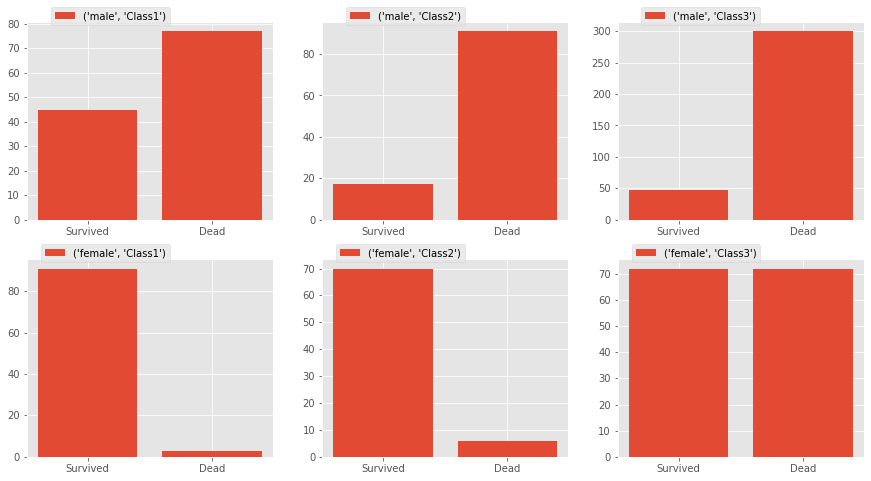

In [47]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
Sex1=['male','female']
for i,ax in zip(Sex1,axes):
    for j,pp in zip(range(1,4),ax):
        PclassSex=combined_data[(combined_data.Sex==i)&(combined_data.Pclass==j)]['Survived'].value_counts().sort_index(ascending=False)
        pp.bar(range(len(PclassSex)),PclassSex,label=(i,'Class'+str(j)))
        pp.set_xticks((0,1))
        pp.set_xticklabels(('Survived','Dead'))
        pp.legend(bbox_to_anchor=(0.6,1.1))

# Feature Engeneering

In [48]:
# create age bands
combined_data.AgeCut=pd.cut(combined_data.Age,5)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [49]:
# create fare bands
combined_data.FareCut=pd.qcut(combined_data.Fare,5)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [50]:
combined_data.AgeCut.value_counts().sort_index()

(0.0902, 16.136]    152
(16.136, 32.102]    564
(32.102, 48.068]    473
(48.068, 64.034]    107
(64.034, 80.0]       13
Name: Age, dtype: int64

In [51]:
combined_data.FareCut.value_counts().sort_index()

(-0.001, 7.854]      275
(7.854, 10.5]        255
(10.5, 21.558]       255
(21.558, 41.579]     265
(41.579, 512.329]    259
Name: Fare, dtype: int64

In [52]:
# replace agebands with ordinals
combined_data.loc[combined_data.Age<=16.136,'AgeCut']=1
combined_data.loc[(combined_data.Age>16.136)&(combined_data.Age<=32.102),'AgeCut']=2
combined_data.loc[(combined_data.Age>32.102)&(combined_data.Age<=48.068),'AgeCut']=3
combined_data.loc[(combined_data.Age>48.068)&(combined_data.Age<=64.034),'AgeCut']=4
combined_data.loc[combined_data.Age>64.034,'AgeCut']=5

In [53]:
combined_data.loc[combined_data.Fare<=7.854,'FareCut']=1
combined_data.loc[(combined_data.Fare>7.854)&(combined_data.Fare<=10.5),'FareCut']=2
combined_data.loc[(combined_data.Fare>10.5)&(combined_data.Fare<=21.558),'FareCut']=3
combined_data.loc[(combined_data.Fare>21.558)&(combined_data.Fare<=41.579),'FareCut']=4
combined_data.loc[combined_data.Fare>41.579,'FareCut']=5

__We can see from the plot that 'FareCut' has a big impact on survial rate.__

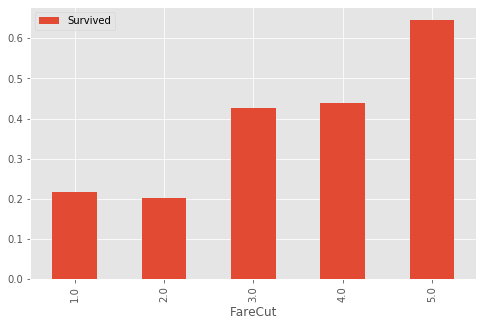

In [54]:
combined_data[['FareCut','Survived']].groupby(['FareCut']).mean().plot.bar(figsize=(8,5))

In [55]:
combined_data.corr()

Age     Cabin      Fare     Parch  PassengerId    Pclass  \
Age          1.000000  0.257126  0.153051 -0.161843     0.026528 -0.361790   
Cabin        0.257126  1.000000  0.507352  0.036806    -0.000208 -0.713857   
Fare         0.153051  0.507352  1.000000  0.221668     0.031029 -0.558740   
Parch       -0.161843  0.036806  0.221668  1.000000     0.008942  0.018322   
PassengerId  0.026528 -0.000208  0.031029  0.008942     1.000000 -0.038354   
Pclass      -0.361790 -0.713857 -0.558740  0.018322    -0.038354  1.000000   
SibSp       -0.259798 -0.009064  0.160388  0.373587    -0.055224  0.060832   
Survived    -0.077692  0.316912  0.257307  0.081629    -0.005007 -0.338481   
AgeCut       0.939760  0.234979  0.135191 -0.159184     0.017900 -0.328087   
FareCut      0.129070  0.535707  0.603698  0.337256    -0.003346 -0.720881   

                SibSp  Survived    AgeCut   FareCut  
Age         -0.259798 -0.077692  0.939760  0.129070  
Cabin       -0.009064  0.316912  0.234979  0.535707  
Fare         0.160388  0.257307  0.135191  0.603698  
Parch        0.373587  0.081629 -0.159184  0.337256  
PassengerId -0.055224 -0.005007  0.017900 -0.003346  
Pclass       0.060832 -0.338481 -0.328087 -0.720881  
SibSp        1.000000 -0.035322 -0.256077  0.351834  
Survived    -0.035322  1.000000 -0.103700  0.318206  
AgeCut      -0.256077 -0.103700  1.000000  0.091607  
FareCut      0.351834  0.318206  0.091607  1.000000

__We haven't gererate any feature from 'Parch','Pclass','SibSp','Title', so let's do this by using pivot table.__

In [56]:
combined_data[combined_data.Survived.notnull()].pivot_table(index=['Title','Pclass'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Pclass          
Rarewoman 2       1.000000
          1       1.000000
Master    1       1.000000
          2       1.000000
Girl      2       1.000000
Miss      1       0.977273
Mrs       1       0.976190
Miss      2       0.920000
Mrs       2       0.902439
Miss      3       0.552239
Mrs       3       0.500000
Girl      1       0.500000
Rareman   1       0.416667
Girl      3       0.400000
Master    3       0.392857
Mr        1       0.345794
          3       0.112853
          2       0.082474
Rareman   2       0.000000

In [57]:
combined_data[combined_data.Survived.notnull()].pivot_table(index=['Title','Parch'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Parch          
Rarewoman 0      1.000000
Master    0      1.000000
Miss      1      0.875000
          2      0.857143
Mrs       0      0.855072
          1      0.812500
          2      0.769231
          3      0.750000
Girl      0      0.750000
Miss      0      0.736842
Girl      1      0.650000
Master    1      0.608696
          2      0.500000
Rareman   0      0.384615
Girl      2      0.363636
Mrs       5      0.250000
Mr        0      0.157447
          1      0.147059
          2      0.133333
          4      0.000000
          5      0.000000
Mrs       4      0.000000
          6      0.000000
Rareman   1      0.000000
Mr        3      0.000000

#### _From the pivot tables above, there is definitely a relationship among 'Survived','Title','Pclass','Parch'. So we can combine them together._

In [58]:
# only choose the object with not null 'Survived'.
TPP=combined_data[combined_data.Survived.notnull()].pivot_table(index=['Title','Pclass','Parch'],values=['Survived']).sort_values('Survived',ascending=False)
TPP

Survived
Title     Pclass Parch          
Rarewoman 2      0      1.000000
Master    3      0      1.000000
Mrs       1      1      1.000000
          2      2      1.000000
                 3      1.000000
Miss      2      2      1.000000
                 1      1.000000
          1      2      1.000000
Mrs       1      0      1.000000
Miss      1      1      1.000000
Girl      2      1      1.000000
Master    2      2      1.000000
                 1      1.000000
          1      2      1.000000
Rarewoman 1      0      1.000000
Girl      2      2      1.000000
Miss      1      0      0.966667
Mrs       2      1      0.909091
Miss      2      0      0.904762
Mrs       2      0      0.869565
Girl      3      0      0.750000
Mrs       3      2      0.666667
                 0      0.611111
Miss      3      0      0.571429
Girl      3      1      0.533333
Mrs       1      2      0.500000
          3      3      0.500000
Girl      1      2      0.500000
Rareman   1      0      0.454545
Mrs       3      1      0.444444
Master    3      1      0.437500
Mr        1      2      0.400000
                 0      0.352273
Miss      3      2      0.333333
Mr        1      1      0.307692
Master    3      2      0.272727
Mrs       3      5      0.250000
Girl      3      2      0.187500
Mr        3      0      0.118644
          2      0      0.091954
          3      1      0.071429
          1      4      0.000000
Miss      3      1      0.000000
Mr        2      2      0.000000
          3      5      0.000000
Mrs       3      4      0.000000
Mr        3      4      0.000000
Mrs       3      6      0.000000
Mr        3      3      0.000000
Rareman   1      1      0.000000
          2      0      0.000000
Mr        3      2      0.000000
          2      1      0.000000

Text(34, 0.54, '50% survival rate')

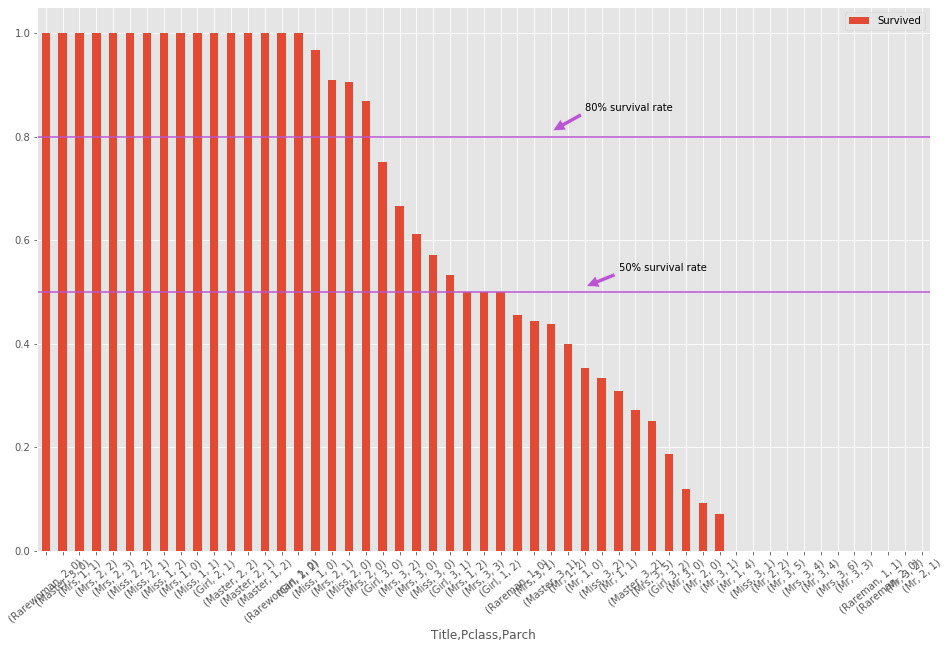

In [59]:
TPP.plot(kind='bar',figsize=(16,10))
plt.xticks(rotation=40)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% survival rate',xy=(30,0.81),xytext=(32,0.85),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% survival rate',xy=(32,0.51),xytext=(34,0.54),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))

__From the plot, we can draw some horizontal lines and make some classification. I only choose 80% and 50%, because I'm so afraid of overfitting.__

In [60]:
# use 'Title','Pclass','Parch' to generate feature 'TPP'.
Tit=['Girl','Master','Mr','Miss','Mrs','Rareman','Rarewoman']
for i in Tit:
    for j in range(1,4):
        for g in range(0,10):
            if combined_data.loc[(combined_data.Title==i)&(combined_data.Pclass==j)&(combined_data.Parch==g)&(combined_data.Survived.notnull()),'Survived'].mean()>=0.8:
                combined_data.loc[(combined_data.Title==i)&(combined_data.Pclass==j)&(combined_data.Parch==g),'TPP']=1
            elif combined_data.loc[(combined_data.Title==i)&(combined_data.Pclass==j)&(combined_data.Parch==g)&(combined_data.Survived.notnull()),'Survived'].mean()>=0.5:
                combined_data.loc[(combined_data.Title==i)&(combined_data.Pclass==j)&(combined_data.Parch==g),'TPP']=2
            elif combined_data.loc[(combined_data.Title==i)&(combined_data.Pclass==j)&(combined_data.Parch==g)&(combined_data.Survived.notnull()),'Survived'].mean()>=0:
                combined_data.loc[(combined_data.Title==i)&(combined_data.Pclass==j)&(combined_data.Parch==g),'TPP']=3
            else: 
                combined_data.loc[(combined_data.Title==i)&(combined_data.Pclass==j)&(combined_data.Parch==g),'TPP']=4

+ __'TPP=1' means highest probability to survive, and 'TPP=3' means the lowest.__
+ __'TPP=4' means there is no such combination of (Title&Pclass&Pclass) in train set. Let's see what kind of combination it contains.__

In [61]:
combined_data[combined_data.TPP==4]

Age  Cabin Embarked     Fare  \
915   48.0      1        C  262.375   
960   60.0      1        S  263.000   
979   33.0      0        Q    7.750   
1011  12.0      0        S   15.750   
1030  40.0      0        S   46.900   
1033  61.0      1        C  262.375   
1233  34.5      0        S   69.550   
1256  39.0      0        S   69.550   

                                                 Name  Parch  PassengerId  \
915   Ryerson, Mrs. Arthur Larned (Emily Maria Borie)      3          916   
960               Fortune, Mrs. Mark (Mary McDougald)      4          961   
979                           O'Donoghue, Ms. Bridget      0          980   
1011                             Watt, Miss. Bertha J      0         1012   
1030                   Goodwin, Mr. Charles Frederick      6         1031   
1033                       Ryerson, Mr. Arthur Larned      3         1034   
1233                            Sage, Mr. John George      9         1234   
1256                   Sage, Mrs. John (Annie Bullen)      9         1257   

      Pclass     Sex  SibSp  Survived      Ticket      Title  AgeCut  FareCut  \
915        1  female      1       NaN    PC 17608        Mrs     3.0      5.0   
960        1  female      1       NaN       19950        Mrs     4.0      5.0   
979        3  female      0       NaN      364856  Rarewoman     3.0      1.0   
1011       2  female      0       NaN  C.A. 33595       Girl     1.0      3.0   
1030       3    male      1       NaN     CA 2144         Mr     3.0      5.0   
1033       1    male      1       NaN    PC 17608         Mr     4.0      5.0   
1233       3    male      1       NaN    CA. 2343         Mr     3.0      5.0   
1256       3  female      1       NaN    CA. 2343        Mrs     3.0      5.0   

      TPP  
915   4.0  
960   4.0  
979   4.0  
1011  4.0  
1030  4.0  
1033  4.0  
1233  4.0  
1256  4.0

__ We can simply classify them by 'Sex'&'Pclass'.__

In [62]:
combined_data.ix[(combined_data.TPP==4)&(combined_data.Sex=='female')&(combined_data.Pclass!=3),'TPP']=1
combined_data.ix[(combined_data.TPP==4)&(combined_data.Sex=='female')&(combined_data.Pclass==3),'TPP']=2
combined_data.ix[(combined_data.TPP==4)&(combined_data.Sex=='male')&(combined_data.Pclass!=3),'TPP']=2
combined_data.ix[(combined_data.TPP==4)&(combined_data.Sex=='male')&(combined_data.Pclass==3),'TPP']=3

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel packag

In [63]:
combined_data.TPP.value_counts()

3.0    870
1.0    262
2.0    177
Name: TPP, dtype: int64

In [64]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
AgeCut         1309 non-null float64
FareCut        1309 non-null float64
TPP            1309 non-null float64
dtypes: float64(6), int64(5), object(5)
memory usage: 163.8+ KB


# Basic Modeling & Evaluation

In [65]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare']

In [66]:
# convert categorical variables to numerical variables
combined_data_dummies=pd.get_dummies(combined_data[predictors])

In [67]:
combined_data_dummies.head()

Cabin  Parch  Pclass  SibSp  AgeCut  TPP  FareCut   Age     Fare  \
0      0      0       3      1     2.0  3.0      1.0  22.0   7.2500   
1      1      0       1      1     3.0  1.0      5.0  38.0  71.2833   
2      0      0       3      0     2.0  2.0      2.0  26.0   7.9250   
3      1      0       1      1     3.0  1.0      5.0  35.0  53.1000   
4      0      0       3      0     3.0  3.0      2.0  35.0   8.0500   

   Embarked_C  ...  Embarked_S  Sex_female  Sex_male  Title_Girl  \
0           0  ...           1           0         1           0   
1           1  ...           0           1         0           0   
2           0  ...           1           1         0           0   
3           0  ...           1           1         0           0   
4           0  ...           1           0         1           0   

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rareman  \
0             0           0         1          0              0   
1             0           0         0          1              0   
2             0           1         0          0              0   
3             0           0         0          1              0   
4             0           0         1          0              0   

   Title_Rarewoman  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 21 columns]

__We choose 7 models and use 5-folds cross-calidation to evaluate these models.__

Models include:

+ k-Nearest Neighbors
+ Logistic Regression
+ Naive Bayes classifier
+ Decision Tree
+ Random Forrest
+ Gradient Boosting Decision Tree
+ Support Vector Machine

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [70]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
       GradientBoostingClassifier(),SVC()]

In [71]:
combined_data.shape,combined_data_dummies.shape

((1309, 16), (1309, 21))

In [72]:
X=combined_data_dummies[:891]
y=combined_data.Survived[:891]
test_X=combined_data_dummies[891:]

__As some algorithms such as KNN and SVM are sensitive to the scaling of the data, here we also apply standard-scaling to the data.__

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)
test_X_scaled=scaler.fit(X).transform(test_X)

In [75]:
# evaluate models by using cross-validation
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X,y,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.717284000529118,[0.67597765 0.69832402 0.73033708 0.7247191  0.75706215]
LR:0.8305423069189268,[0.83798883 0.82681564 0.80337079 0.83707865 0.84745763]
NB:0.8091685293960147,[0.84357542 0.81564246 0.78651685 0.78089888 0.81920904]
Tree:0.7923643168792537,[0.80446927 0.77094972 0.84269663 0.76404494 0.77966102]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

RF:0.8159414877790414,[0.82681564 0.80446927 0.83146067 0.79775281 0.81920904]
GDBT:0.8418226270282118,[0.8547486  0.80446927 0.86516854 0.80337079 0.88135593]
SVM:0.74980592505746,[0.72625698 0.73743017 0.75842697 0.73595506 0.79096045]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

In [76]:
# used scaled data
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.809256621156137,[0.82122905 0.77653631 0.80337079 0.80898876 0.83615819]
LR:0.8328336502012388,[0.82681564 0.81564246 0.8258427  0.83146067 0.86440678]
NB:0.8048001143348771,[0.75977654 0.82122905 0.80898876 0.78089888 0.85310734]
Tree:0.7800298036695679,[0.79329609 0.75418994 0.8258427  0.75280899 0.7740113 ]
RF:0.8215533300919537,[0.8547486  0.79329609 0.87640449 0.75280899 0.83050847]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

GDBT:0.840692683525387,[0.8547486  0.80446927 0.86516854 0.80337079 0.87570621]
SVM:0.830580253047482,[0.82681564 0.82681564 0.83146067 0.79775281 0.8700565 ]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

__'k-Nearest Neighbors', 'Support Vector Machine' perform much better on scaled data__

**Then we use (feature importances) in GradientBoostingClassifier to see which features are important.**

In [77]:
model=GradientBoostingClassifier()

In [78]:
model.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
model.feature_importances_

array([3.75796390e-02, 1.91089681e-03, 7.91168391e-03, 2.28545198e-02,
       6.94686666e-03, 6.40412904e-01, 4.53057029e-03, 8.39726418e-02,
       1.23756890e-01, 1.82856543e-03, 0.00000000e+00, 1.88848761e-02,
       3.25627818e-04, 1.55986131e-04, 9.96125674e-04, 1.09266841e-02,
       2.38082617e-04, 3.43667906e-02, 2.14888780e-03, 2.51761519e-04,
       0.00000000e+00])

In [80]:
X.columns

Index(['Cabin', 'Parch', 'Pclass', 'SibSp', 'AgeCut', 'TPP', 'FareCut', 'Age',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Title_Girl', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rareman', 'Title_Rarewoman'],
      dtype='object')

In [81]:
fi=pd.DataFrame({'importance':model.feature_importances_},index=X.columns)

In [82]:
fi.sort_values('importance',ascending=False)

importance
TPP                0.640413
Fare               0.123757
Age                0.083973
Cabin              0.037580
Title_Mr           0.034367
SibSp              0.022855
Embarked_S         0.018885
Title_Master       0.010927
Pclass             0.007912
AgeCut             0.006947
FareCut            0.004531
Title_Mrs          0.002149
Parch              0.001911
Embarked_C         0.001829
Title_Girl         0.000996
Sex_female         0.000326
Title_Rareman      0.000252
Title_Miss         0.000238
Sex_male           0.000156
Embarked_Q         0.000000
Title_Rarewoman    0.000000

Text(0.5, 1.0, 'Feature Importance')

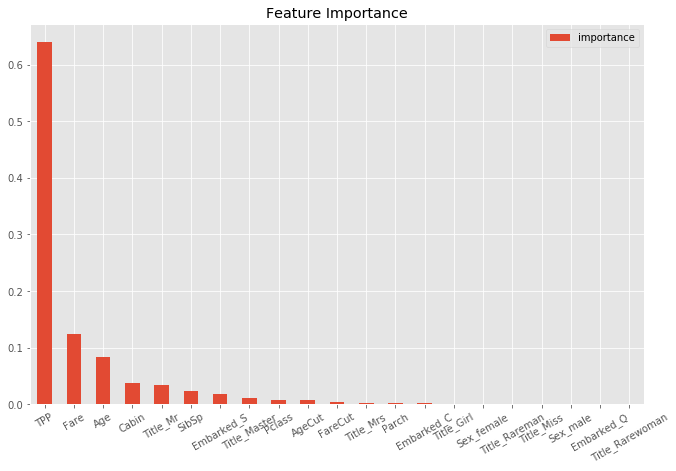

In [83]:
fi.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

__Based on the bar plot, 'TPP','Fare','Age' are the most important.__

**Now let's think through this problem in another way. Our goal here is to improve the overall accuracy. This is equivalent to minimizing the misclassified observations. So if all the misclassified observations are found, maybe we can see the pattern and generate some new features.**

**Again we use cross-validation to search for the miscalssified observations**

In [84]:
from sklearn.model_selection import KFold

In [85]:
kf=KFold(n_splits=10,random_state=1)

In [86]:
kf.get_n_splits(X)

10

In [87]:
print(kf)

KFold(n_splits=10, random_state=1, shuffle=False)


In [88]:
# extract the indices of misclassified observations
rr=[]
for train_index, val_index in kf.split(X):
    pred=model.fit(X.ix[train_index],y[train_index]).predict(X.ix[val_index])
    rr.append(y[val_index][pred!=y[val_index]].index.values)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing 

In [89]:
rr

[array([ 2, 14, 17, 18, 21, 23, 25, 30, 36, 38, 40, 41, 49, 55, 68, 74, 79,
        81, 85], dtype=int64),
 array([106, 107, 111, 114, 127, 137, 139, 140, 141, 142, 146, 165, 169,
        177], dtype=int64),
 array([184, 187, 199, 204, 205, 207, 209, 220, 224, 226, 233, 235, 240,
        246, 248, 251, 261, 264, 267], dtype=int64),
 array([271, 273, 279, 283, 286, 288, 297, 301, 312, 315, 328, 330, 338,
        347, 351], dtype=int64),
 array([357, 361, 390, 391, 396, 400, 414, 415, 429, 431, 444], dtype=int64),
 array([447, 449, 452, 453, 455, 460, 483, 489, 501, 502, 505, 507, 509,
        510, 534], dtype=int64),
 array([543, 547, 550, 553, 554, 569, 570, 578, 579, 587, 604, 607, 617,
        621, 622], dtype=int64),
 array([630, 632, 643, 645, 647, 649, 654, 659, 660, 664, 673, 677, 680,
        692, 698, 711, 712], dtype=int64),
 array([729, 744, 748, 762, 767, 772, 782], dtype=int64),
 array([804, 807, 816, 821, 828, 839, 852, 854, 855, 857], dtype=int64)]

In [90]:
# combine all the indices
whole_index=np.concatenate(rr)
len(whole_index)

142

In [91]:
combined_data.ix[whole_index].head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Age  Cabin Embarked     Fare  \
2   26.0      0        S   7.9250   
14  14.0      0        S   7.8542   
17  34.5      0        S  13.0000   
18  31.0      0        S  18.0000   
21  34.0      1        S  13.0000   

                                                 Name  Parch  PassengerId  \
2                              Heikkinen, Miss. Laina      0            3   
14               Vestrom, Miss. Hulda Amanda Adolfina      0           15   
17                       Williams, Mr. Charles Eugene      0           18   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...      0           19   
21                              Beesley, Mr. Lawrence      0           22   

    Pclass     Sex  SibSp  Survived            Ticket Title  AgeCut  FareCut  \
2        3  female      0       1.0  STON/O2. 3101282  Miss     2.0      2.0   
14       3  female      0       0.0            350406  Girl     1.0      2.0   
17       2    male      0       1.0            244373    Mr     3.0      3.0   
18       3  female      1       0.0            345763   Mrs     2.0      3.0   
21       2    male      0       1.0            248698    Mr     3.0      3.0   

    TPP  
2   2.0  
14  2.0  
17  3.0  
18  2.0  
21  3.0

In [92]:
diff=combined_data.ix[whole_index]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [93]:
diff.describe()

Age       Cabin        Fare       Parch  PassengerId  \
count  142.000000  142.000000  142.000000  142.000000   142.000000   
mean    30.767606    0.260563   25.818838    0.267606   402.225352   
std     12.666853    0.440496   28.246596    0.693593   249.259966   
min      2.000000    0.000000    0.000000    0.000000     3.000000   
25%     23.250000    0.000000    7.925000    0.000000   201.250000   
50%     30.000000    0.000000   14.852050    0.000000   394.500000   
75%     37.000000    1.000000   29.700000    0.000000   621.000000   
max     80.000000    1.000000  151.550000    5.000000   858.000000   

           Pclass       SibSp    Survived      AgeCut     FareCut         TPP  
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000  
mean     2.345070    0.429577    0.647887    2.422535    2.950704    2.605634  
std      0.883624    0.775492    0.479320    0.783916    1.333302    0.582946  
min      1.000000    0.000000    0.000000    1.000000    1.000000    1.000000  
25%      1.000000    0.000000    0.000000    2.000000    2.000000    2.000000  
50%      3.000000    0.000000    1.000000    2.000000    3.000000    3.000000  
75%      3.000000    1.000000    1.000000    3.000000    4.000000    3.000000  
max      3.000000    4.000000    1.000000    5.000000    5.000000    3.000000

In [94]:
diff.describe(include=['O'])

Embarked                           Name   Sex Ticket Title
count       142                            142   142    142   142
unique        3                            142     2    130     6
top           S  Boulos, Mrs. Joseph (Sultana)  male   1601    Mr
freq        101                              1    85      5    77

In [95]:
# both mean and count of 'survived' should be considered.
diff.groupby(['Title'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title                    
Girl     0.333333       6
Master   1.000000       3
Miss     0.333333      30
Mr       0.831169      77
Mrs      0.428571      21
Rareman  0.800000       5

In [96]:
diff.groupby(['Title','Pclass'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass                  
Girl    1       0.000000       1
        3       0.400000       5
Master  3       1.000000       3
Miss    1       0.000000       1
        2       0.000000       2
        3       0.370370      27
Mr      1       0.656250      32
        2       0.888889       9
        3       0.972222      36
Mrs     2       0.000000       4
        3       0.529412      17
Rareman 1       0.800000       5

**It seems mainly the third class 'Miss'/'Mrs' and the first/third class 'Mr' are missclassified.**

In [97]:
diff.groupby(['Title','Pclass','Parch','SibSp'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass Parch SibSp                  
Girl    1      2     1      0.000000       1
        3      0     0      0.000000       1
               1     0      0.000000       1
                     1      0.000000       1
               2     0      1.000000       1
                     4      1.000000       1
Master  3      1     1      1.000000       1
               2     0      1.000000       1
                     4      1.000000       1
Miss    1      0     0      0.000000       1
        2      0     0      0.000000       2
        3      0     0      0.380952      21
                     1      0.000000       3
                     2      0.500000       2
               2     4      1.000000       1
Mr      1      0     0      0.705882      17
                     1      0.625000       8
               1     0      0.000000       1
                     1      0.666667       3
               2     0      0.500000       2
                     1      1.000000       1
        2      0     0      1.000000       7
                     1      0.500000       2
        3      0     0      0.968750      32
                     1      1.000000       2
                     2      1.000000       1
               1     1      1.000000       1
Mrs     2      0     0      0.000000       1
                     1      0.000000       2
               1     1      0.000000       1
        3      0     0      0.500000       2
                     1      0.375000       8
                     3      1.000000       1
               1     0      1.000000       1
                     1      0.666667       3
               2     0      0.000000       1
               5     1      1.000000       1
Rareman 1      0     0      0.750000       4
                     2      1.000000       1

Gererally, we should only pick the categories with relatively large numbers. That is:

1. **'Mr','Pclass 1','Parch 0','SibSp 0', 17**
2. **'Mr','Pclass 1','Parch 0','SibSp 1', 8**
3. **'Mr','Pclass 2/3','Parch 0','SibSp 0', 32+7**
4. **'Miss','Pclass 3','Parch 0','SibSp 0', 21**

__Then we add new feature 'MPPS'.__

In [98]:
combined_data.loc[(combined_data.Title=='Mr')&(combined_data.Pclass==1)&(combined_data.Parch==0)&((combined_data.SibSp==0)|(combined_data.SibSp==1)),'MPPS']=1
combined_data.loc[(combined_data.Title=='Mr')&(combined_data.Pclass!=1)&(combined_data.Parch==0)&(combined_data.SibSp==0),'MPPS']=2
combined_data.loc[(combined_data.Title=='Miss')&(combined_data.Pclass==3)&(combined_data.Parch==0)&(combined_data.SibSp==0),'MPPS']=3
combined_data.MPPS.fillna(4,inplace=True)

In [99]:
combined_data.MPPS.value_counts()

4.0    606
2.0    485
1.0    132
3.0     86
Name: MPPS, dtype: int64

From the __feature-Importance__ plot we can see the 'Fare' is the most important feature, let's explore whether we can generate some new feature.

In [101]:
diff[(diff.Title=='Mr')|(diff.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                         \
               count                  mean                              std   
Pclass             1    2     3          1          2          3          1   
Title Survived                                                                
Miss  0.0        1.0  2.0  17.0  28.712500  13.000000   9.564712        NaN   
      1.0        NaN  NaN  10.0        NaN        NaN   9.999590        NaN   
Mr    0.0       11.0  1.0   1.0  60.678027  27.720800  56.495800  35.887886   
      1.0       21.0  8.0  35.0  51.167862  14.107812  14.217260  30.466921   

                                              ...                              \
                                         min  ...       25%      50%            
Pclass                 2          3        1  ...         3        1        2   
Title Survived                                ...                               
Miss  0.0       0.000000   3.410307  28.7125  ...   7.75000  28.7125  13.0000   
      1.0            NaN   4.904273      NaN  ...   7.75625      NaN      NaN   
Mr    0.0            NaN        NaN  26.5500  ...  56.49580  53.1000  27.7208   
      1.0       4.963091  15.845064  26.5500  ...   7.77500  35.5000  13.0000   

                                                                           \
                             75%                             max            
Pclass                3        1          2          3         1        2   
Title Survived                                                              
Miss  0.0        7.8542  28.7125  13.000000   8.662500   28.7125  13.0000   
      1.0        7.8896      NaN        NaN   9.362525       NaN      NaN   
Mr    0.0       56.4958  94.0500  27.720800  56.495800  113.2750  27.7208   
      1.0        7.9250  76.7292  13.215625   9.081250  120.0000  26.0000   

                         
                         
Pclass                3  
Title Survived           
Miss  0.0       18.0000  
      1.0       23.2500  
Mr    0.0       56.4958  
      1.0       56.4958  

[4 rows x 24 columns]

In [102]:
combined_data[(combined_data.Title=='Mr')|(combined_data.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                 \
               count                     mean                         
Pclass             1     2      3           1          2          3   
Title Survived                                                        
Miss  0.0        1.0   2.0   30.0   28.712500  13.000000  11.637643   
      1.0       43.0  23.0   37.0  126.099126  17.611230   9.216559   
Mr    0.0       70.0  89.0  283.0   65.164104  19.651638  10.779237   
      1.0       37.0   8.0   36.0   73.464646  14.107812  15.391664   

                                                           ...          \
                       std                            min  ...     25%   
Pclass                   1          2          3        1  ...       3   
Title Survived                                             ...           
Miss  0.0              NaN   0.000000   8.512399  28.7125  ...  7.7750   
      1.0        92.270616  12.193091   4.004733  26.2833  ...  7.7500   
Mr    0.0        61.918723  15.857649   9.170363   0.0000  ...  7.7333   
      1.0       109.590302   4.963091  17.133150  26.2875  ...  7.7750   

                                                                       \
                    50%                       75%                       
Pclass                1     2       3           1          2        3   
Title Survived                                                          
Miss  0.0       28.7125  13.0  8.4000   28.712500  13.000000  10.3469   
      1.0       90.0000  13.0  7.7750  152.506250  17.429150   7.9250   
Mr    0.0       48.3021  13.0  7.8958   78.459375  26.000000   8.6625   
      1.0       35.5000  13.0  7.9250   76.729200  13.215625   9.5000   

                                         
                     max                 
Pclass                 1     2        3  
Title Survived                           
Miss  0.0        28.7125  13.0  46.9000  
      1.0       512.3292  65.0  24.1500  
Mr    0.0       263.0000  73.5  69.5500  
      1.0       512.3292  26.0  56.4958  

[4 rows x 24 columns]

But there seems no big difference between the 'Fare' of 'diff' and 'combined_data'.

__Finally we could draw a corrlelation heatmap__

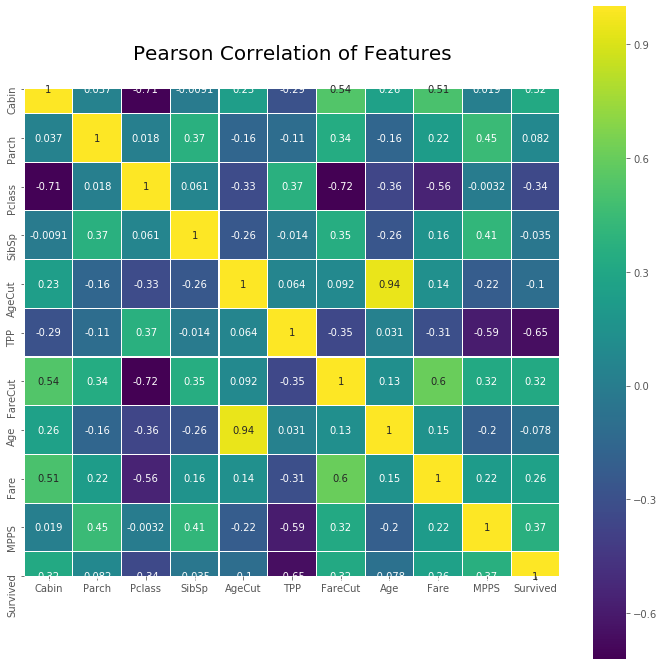

In [103]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(combined_data[['Cabin','Parch','Pclass','SibSp','AgeCut','TPP','FareCut','Age','Fare','MPPS','Survived']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Hyperparameters Tuning

__Now let's do grid search for some algorithms. Since many algorithms performs better in scaled data, we will use scaled data.__

In [104]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare','MPPS']
combined_data_dummies=pd.get_dummies(combined_data[predictors])
X=combined_data_dummies[:891]
y=combined_data.Survived[:891]
test_X=combined_data_dummies[891:]

scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)
test_X_scaled=scaler.fit(X).transform(test_X)

In [105]:
from sklearn.model_selection import GridSearchCV

### k-Nearest Neighbors

In [106]:
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 8}, 0.8305274971941639)

### Logistic Regression

In [107]:
param_grid={'C':[0.01,0.1,1,10]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

({'C': 1}, 0.8294051627384961)

In [108]:
# second round grid search
param_grid={'C':[0.04,0.06,0.08,0.1,0.12,0.14]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

({'C': 0.06}, 0.8338945005611672)

### Support Vector Machine

In [109]:
param_grid={'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 10, 'gamma': 0.01}, 0.8294051627384961)

In [110]:
#second round grid search
param_grid={'C':[2,4,6,8,10,12,14],'gamma':[0.008,0.01,0.012,0.015,0.02]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 2, 'gamma': 0.012}, 0.8338945005611672)

### Gradient Boosting Decision Tree

In [133]:
param_grid={'n_estimators':[30,50,80,120,200],'learning_rate':[0.05,0.1,0.5,1],'max_depth':[1,2,3,4,5]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120},
 0.8484848484848485)

In [134]:
#second round search
param_grid={'n_estimators':[100,120,140,160],'learning_rate':[0.05,0.08,0.1,0.12],'max_depth':[3,4]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 100},
 0.8507295173961841)

# Ensemble Methods 

## Bagging

__We use logistic regression with the parameter we just tuned to apply bagging.__

In [135]:
from sklearn.ensemble import BaggingClassifier

In [136]:
bagging=BaggingClassifier(LogisticRegression(C=0.06),n_estimators=100)

## VotingClassifier

__We use five models to apply votingclassifier, namely logistic regression, random forest, gradient boosting decision,support vector machine and k-nearest neighbors.__

In [115]:
from sklearn.ensemble import VotingClassifier

In [137]:
clf1=LogisticRegression(C=0.06)
clf2=RandomForestClassifier(n_estimators=500)
clf3=GradientBoostingClassifier(n_estimators=120,learning_rate=0.12,max_depth=4)
clf4=SVC(C=4,gamma=0.015,probability=True)
clf5=KNeighborsClassifier(n_neighbors=8)

In [117]:
eclf_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('SVM',clf4),('KNN',clf5)])

In [138]:
# add weights
eclfW_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('SVM',clf4),('KNN',clf5)],weights=[1,1,2,2,1])

In [139]:
# soft voting
eclf_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('SVM',clf4),('KNN',clf5)],voting='soft')

In [140]:
# add weights
eclfW_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('SVM',clf4),('KNN',clf5)],voting='soft',weights=[1,1,2,2,1])

__Finally we can evaluate all the models we just used.__

In [141]:
models=[KNeighborsClassifier(n_neighbors=8),LogisticRegression(C=0.06),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=500),
        SVC(C=4,gamma=0.015),
        eclf_hard,eclf_soft,eclfW_hard,eclfW_soft,bagging]

In [142]:
names=['KNN','LR','NB','CART','RF','SVM','VC_hard','VC_soft','VCW_hard','VCW_soft','Bagging']
for name,model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=5)
    print("{}: {},{}".format(name,score.mean(),score))

KNN: 0.8305672733436957,[0.84916201 0.78212291 0.87640449 0.80898876 0.83615819]
LR: 0.8339321374274015,[0.84357542 0.82122905 0.81460674 0.8258427  0.86440678]
NB: 0.809294567284692,[0.76536313 0.82122905 0.81460674 0.78651685 0.85875706]
CART: 0.784517837694833,[0.7877095  0.75977654 0.83707865 0.76966292 0.76836158]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

RF: 0.7991377717536821,[0.82122905 0.76536313 0.84831461 0.74157303 0.81920904]
SVM: 0.8328148899189903,[0.83240223 0.83240223 0.83146067 0.79775281 0.8700565 ]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

VC_hard: 0.8418036539639342,[0.84357542 0.82122905 0.87078652 0.80337079 0.8700565 ]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

VC_soft: 0.833938343569922,[0.83798883 0.81564246 0.85393258 0.80337079 0.85875706]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Number of `estimators` and weights must be equal; got 5 weights, 4 estimators

## Stacking

__We use logistic regression, k-nearest neighbors, support vector machine, Gradient Boosting Decision Tree as first-level models, and use random forest as second-level model.__

In [143]:
from sklearn.model_selection import StratifiedKFold
n_train=train.shape[0]
n_test=test.shape[0]
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)  

In [144]:
def get_oof(clf,X,y,test_X):
    oof_train=np.zeros((n_train,))
    oof_test_mean=np.zeros((n_test,))
    oof_test_single=np.empty((5,n_test))
    for i, (train_index,val_index) in enumerate(kf.split(X,y)):
        kf_X_train=X[train_index]
        kf_y_train=y[train_index]
        kf_X_val=X[val_index]
        
        clf.fit(kf_X_train,kf_y_train)
        
        oof_train[val_index]=clf.predict(kf_X_val)
        oof_test_single[i,:]=clf.predict(test_X)
    oof_test_mean=oof_test_single.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test_mean.reshape(-1,1)

In [145]:
LR_train,LR_test=get_oof(LogisticRegression(C=0.06),X_scaled,y,test_X_scaled)
KNN_train,KNN_test=get_oof(KNeighborsClassifier(n_neighbors=8),X_scaled,y,test_X_scaled)
SVM_train,SVM_test=get_oof(SVC(C=4,gamma=0.015),X_scaled,y,test_X_scaled)
GBDT_train,GBDT_test=get_oof(GradientBoostingClassifier(n_estimators=120,learning_rate=0.12,max_depth=4),X_scaled,y,test_X_scaled)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [146]:
X_stack=np.concatenate((LR_train,KNN_train,SVM_train,GBDT_train),axis=1)
y_stack=y
X_test_stack=np.concatenate((LR_test,KNN_test,SVM_test,GBDT_test),axis=1)

In [147]:
X_stack.shape,y_stack.shape,X_test_stack.shape

((891, 4), (891,), (418, 4))

In [148]:
stack_score=cross_val_score(RandomForestClassifier(n_estimators=1000),X_stack,y_stack,cv=5)

In [149]:
# cross-validation score of stacking
stack_score.mean(),stack_score

(0.8406925416707006,
 array([0.84916201, 0.79888268, 0.85393258, 0.83707865, 0.86440678]))

In [150]:
pred=RandomForestClassifier(n_estimators=500).fit(X_stack,y_stack).predict(X_test_stack)

In [151]:
tt=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':pred})

In [156]:
tt.to_csv('submission.csv',index=False)